Selected Features: ['Building_Height', 'Material_Quality_Index', 'Labor_Cost', 'Concrete_Strength', 'Foundation_Depth']


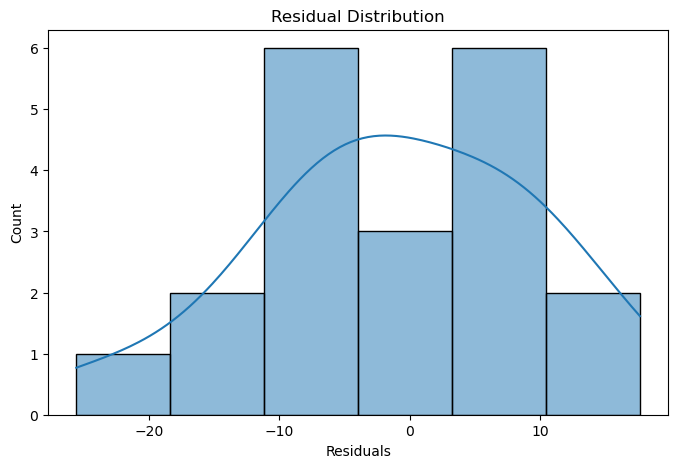

Residuals should be randomly distributed. If not, model assumptions may be violated.
Identified 0 outliers:
Empty DataFrame
Columns: [Project_ID, Building_Height, Material_Quality_Index, Labor_Cost, Concrete_Strength, Foundation_Depth, Weather_Index, Construction_Cost]
Index: []

📌 Model Deployment Suggestions:
- Integrate real-time data on material costs, weather, and labor rates.
- Use cloud-based services for continuous updates and scalability.

⚠️ Ethical & Financial Implications:
- Underestimating costs can lead to budget overruns and project failures.
- Overestimating costs may reduce competitiveness and waste resources.
- Ensuring accurate cost estimation enhances safety, efficiency, and trust in civil engineering projects.

🏗️ Conclusion: Advanced data science techniques improve cost accuracy and project planning. Feature selection, residual analysis, and outlier detection enhance model reliability for real-world applications.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Load dataset
df = pd.read_csv("/Users/kruthikasaisree/Downloads/Civil_Engineering_Regression_Dataset.csv")

# Define independent (X) and dependent (Y) variables
X = df[['Building_Height', 'Material_Quality_Index', 'Labor_Cost', 'Concrete_Strength', 'Foundation_Depth']]
y = df['Construction_Cost']

# Feature Selection using Lasso Regression
lasso = Lasso(alpha=0.1)  # Adjust alpha for stronger/weaker regularization
lasso.fit(X, y)
selected_features = X.columns[lasso.coef_ != 0]
X_selected = X[selected_features]
print(f"Selected Features: {list(selected_features)}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train Multiple Linear Regression model
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Predictions
y_pred = multi_model.predict(X_test)

# Model Evaluation
r2_multi = r2_score(y_test, y_pred)
mse_multi = mean_squared_error(y_test, y_pred)

# Residual Analysis
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Residual Distribution")
plt.show()
print("Residuals should be randomly distributed. If not, model assumptions may be violated.")

# Outlier Detection using Z-score
z_scores = np.abs((df['Construction_Cost'] - df['Construction_Cost'].mean()) / df['Construction_Cost'].std())
outliers = df[z_scores > 3]
print(f"Identified {len(outliers)} outliers:")
print(outliers)

# Model Deployment Considerations
print("\n📌 Model Deployment Suggestions:")
print("- Integrate real-time data on material costs, weather, and labor rates.")
print("- Use cloud-based services for continuous updates and scalability.")

# Ethical Considerations & Decision Making
print("\n⚠️ Ethical & Financial Implications:")
print("- Underestimating costs can lead to budget overruns and project failures.")
print("- Overestimating costs may reduce competitiveness and waste resources.")
print("- Ensuring accurate cost estimation enhances safety, efficiency, and trust in civil engineering projects.")

# Conclusion on Data Science in Construction
print("\n🏗️ Conclusion: Advanced data science techniques improve cost accuracy and project planning. Feature selection, residual analysis, and outlier detection enhance model reliability for real-world applications.")
